## Attribute Information
- 1. age 
- 2. sex (1 = male; 0 = female) 
- 3. chest pain type (4 values) 
  - 1: typical angina 
  - 2: atypical angina 
  - 3: non-anginal pain 
  - 4: asymptomatic 
- 4. resting blood pressure 
- 5. serum cholestoral in mg/dl 
- 6. fasting blood sugar > 120 mg/dl
- 7. resting electrocardiographic results (values 0,1,2)
  - 0: normal 
  - 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) 
  - 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
- 8. maximum heart rate achieved 
- 9. exercise induced angina 
- 10. oldpeak = ST depression induced by exercise relative to rest 
- 11. the slope of the peak exercise ST segment 
- 12. number of major vessels (0-3) colored by flourosopy 
- 13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
- 14. target
  - 0 - no heart disease
  - 1 - heart disease

In [1]:
filename = 'heart_disease_uci.csv'

In [2]:
#https://archive.ics.uci.edu/ml/datasets/Heart+Disease

#Don't think too much about the getDataset method. It is used for convenience
def getDataset(filename, **kwargs):
    url = f'https://github.com/IvanReznikov/mdx-msc-data-science/raw/main/datasets/{filename}'
    try:
        import os
        if filename not in os.listdir():
            !pip install wget
            import wget
            downloaded_filename = wget.download(url)
            print(f'{downloaded_filename} file downloaded')
        else:
            print(f'{filename} already exists')
        return pd.read_csv(filename, **kwargs)
        
    except Exception as e:
        print(e)
        return pd.read_csv(url, **kwargs)

In [3]:
#Import python packages
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.svm import SVC  #Import svm model
from sklearn.metrics import confusion_matrix

In [4]:
#Import the heart data
data = getDataset(filename)

heart_disease_uci.csv already exists


In [5]:
#Display first 5 lines of heart data
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
#Display basic statistics of data
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
#Separate Feature and Target Matrix
x = data.drop('target',axis = 1) 
y = data.target

In [8]:
# Split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5,random_state=42)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

print("X_train Shape : ", x_train.shape)
print("X_test Shape  : ", x_test.shape)
print("y_train Shape : ", y_train.shape)
print("y_test Shape  : ", y_test.shape)

X_train Shape :  (151, 13)
X_test Shape  :  (152, 13)
y_train Shape :  (151,)
y_test Shape  :  (152,)


**Training and Testing the Machine Learning Model - SVM (Support Vector Machines)**

In [9]:
#Create a svm Classifier
ml = SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
ml.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = ml.predict(x_test)

In [10]:
# Model Accuracy: how often is the classifier correct?
ml.score(x_test,y_test)

0.8026315789473685

Calculatate confusion matrix
<br>TP  FP
<br>FN  TN 

<AxesSubplot:>

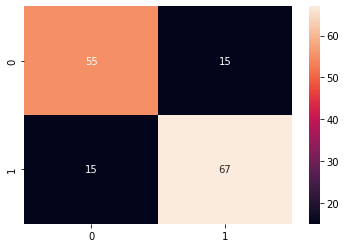

In [11]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True)

**COMMENTS:** 
* 55 patients were predicted that they **will** have Heart Disease,the Prediction was CORRECT (True-Positive)
* 67 patients were predicted that they **will NOT** have Heart Disease,the Prediction was CORRECT (True-Negative)
* 15 patients were predicted that they **will** have Heart Disease but the Prediction was WRONG (False-Positive)
* 15 patients were predicted that they **will NOT** have Heart Disease but the Prediction was WRONG (False-Negative)

In [12]:
#Display basic info about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [13]:
def process_dummies(data, col_name):
    t_df = pd.get_dummies(data[col_name])
    t_df.columns = [f'{col_name}_{x}' for x in t_df.columns]
    t_df = t_df.astype(bool)
    data = pd.concat([data, t_df], axis=1)
    data.drop(col_name, axis=1, inplace=True)
    return data

data = process_dummies(data, 'cp')
data = process_dummies(data, 'restecg')
data['fbs'] = data['fbs'].astype(bool)
data['exang'] = data['exang'].astype(bool)

In [14]:
data

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,thal,target,cp_0,cp_1,cp_2,cp_3,restecg_0,restecg_1,restecg_2
0,63,1,145,233,True,150,False,2.3,0,0,1,1,False,False,False,True,True,False,False
1,37,1,130,250,False,187,False,3.5,0,0,2,1,False,False,True,False,False,True,False
2,41,0,130,204,False,172,False,1.4,2,0,2,1,False,True,False,False,True,False,False
3,56,1,120,236,False,178,False,0.8,2,0,2,1,False,True,False,False,False,True,False
4,57,0,120,354,False,163,True,0.6,2,0,2,1,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,False,123,True,0.2,1,0,3,0,True,False,False,False,False,True,False
299,45,1,110,264,False,132,False,1.2,1,0,3,0,False,False,False,True,False,True,False
300,68,1,144,193,True,141,False,3.4,1,2,3,0,True,False,False,False,False,True,False
301,57,1,130,131,False,115,True,1.2,1,1,3,0,True,False,False,False,False,True,False


In [16]:
x = data.drop('target',axis = 1) 
y = data.target

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5,random_state=42)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [18]:
ml = SVC(kernel='linear')
ml.fit(x_train, y_train)
y_pred = ml.predict(x_test)

In [19]:
ml.score(x_test,y_test)

0.8223684210526315

<AxesSubplot:>

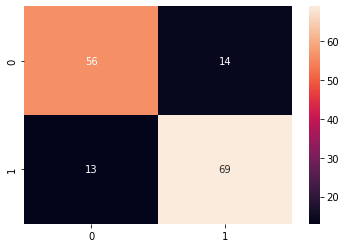

In [20]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True)